# Développement logiciel - HMMA 238


##     Travaux Pratiques Python 

####    Mégane BOYER & Emeline TOUSTOU

# EXERCICE 1: Le jeu de la vie

## Implémentation sans numpy

Nous définissons la fonction $calcul\_nb\_voisins$ dans le fichier utils.py, puis nous l'appelons.

In [1]:
from utils import calcul_nb_voisins

### Question 4 :

Nous allons appliquer la fonction $calcul\_nb\_voisins$ à la liste (de listes) Z suivante et expliquer ce que représente la sortie $N=calcul\_nb\_voisins(Z)$. Nous rappelons que les cellules vivantes sont codées par des 1, les cellules mortes par des 0, et que le pourtour de la grille est supposé toujours inactif (mort).

In [2]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]

Z

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

In [3]:
N = calcul_nb_voisins(Z)

N

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

L'entrée de la fonction $N=calcul\_nb\_voisins(Z)$ est une liste (de listes), composée de 0 et de 1, représentant l'état du jeu de la vie. La sortie $N=calcul\_nb\_voisins(Z)$ est une liste de listes qui représente le nombre de voisins vivants de chaque cellule (de Z) n'appartenant pas au pourtour de la grille. En effet, nous avons supposé que le pourtour de la grille est toujours mort : cette fonction ne s'applique donc pas (conserve les 0) aux cellules du pourtour. Chaque cellule possède au plus 8 cellules voisines vivantes dans son entourage. 

Prenons un exemple : la cellule vivante à la troisième ligne et quatrième colonne de Z possède un voisin vivant au dessus d'elle, un autre en dessous, et un dernier en bas en gauche. Si nous regardons la valeur située à la position correspondante (ligne 3, colonne 4) dans N, nous constatons que cette cellule a effectivement trois voisins vivants.

Nous définissons maintenant la fonction $iteration\_jeu$ dans le fichier utils.py.
Cette fonction prend en argument une liste de listes représentant l'état initial du jeu. Elle retourne l'état de ce dernier après une étape du jeu de la vie, c'est-à-dire l'état de chaque cellule (vivante : 1, morte : 0) après une itération du jeu. Nous affichons la docstring de cette fonction puis nous appliquons cette dernière à la liste Z, définie précédemment.

In [4]:
from utils import iteration_jeu

help(iteration_jeu)

Help on function iteration_jeu in module utils:

iteration_jeu(Z)
    Entrée : Prend en argument une liste de (listes) représentant l'état initial du jeu. 
    Sortie : Retourne une liste de listes correspondant à l'état du jeu à l'étape suivante .
    
    Pour chaque cellule qui n'est pas sur le pourtour de la grille (considéré toujours mort), 
    iteration_jeu détermine le nouvel état de la cellule (vivante ou morte)
    en fonction de son nombre de voisins vivants, calculé par la fonction calcul_nb_voisins.
    
    Une cellule morte avec trois voisins vivants exactement nait (naissance).
    Une cellule vivante ayant deux ou trois voisins vivants reste en vie (équilibre).
    Une cellule vivante ayant au moins quatre voisins vivants meurt par étouffement.
    Une cellule vivante ayant zero ou un voisin vivant meurt par isolement.



In [5]:
iteration_jeu(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

Reprenons l'exemple de la cellule située à la troisième ligne et quatrième colonne. A l'issue d'une itération du jeu de la vie (sortie de la fonction), nous constatons qu'elle est toujours vivante, ce qui est le résultat attendu car elle possède trois voisins vivants. Nous pouvons aussi observer, par exemple, la naissance de la cellule située à la troisième ligne et cinquième colonne car celle-ci possèdait exactement trois voisins vivants à l'étape précédente du jeu de la vie.

### Question 5 :

Dans cette question nous nous proposons pour la liste Z ci-dessus, d'afficher les étapes du jeu de 0 à 9 itérations, en utilisant une boucle for. Nous représentons ces dix étapes du jeu sur deux lignes et cinq colonnes, à l'aide de la fonction subplot de matplotlib. Nous transformerons aussi les listes en array afin de pouvoir utiliser la fonction imshow de matplotlib.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math

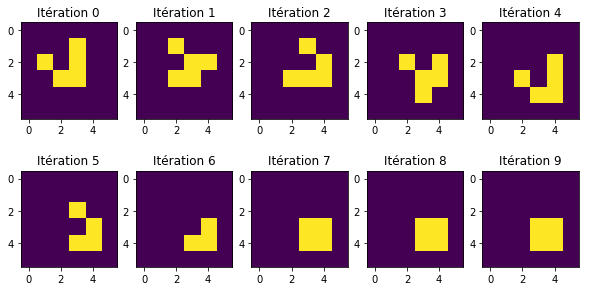

In [7]:
plt.figure(figsize = (10, 5))
Znew = [[0,0,0,0,0,0],
        [0,0,0,1,0,0],
        [0,1,0,1,0,0],
        [0,0,1,1,0,0],
        [0,0,0,0,0,0],
        [0,0,0,0,0,0]]

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(np.array(Znew))
    Znew = iteration_jeu(Znew)
    plt.title("Itération " + str(i))
    


### Question 6: 
Que remarquez-vous entre l'itération 0 et l'itération 4 ? Que se passe-t-il après l'itération 7 ?


Nous observons une évolution des cellules jusqu'à l'itération 6 (incluse). Entre l'itération 0 et l'itération 4, le nombre de cellules vivantes est stable et égal à 5. Les formes se répètent. En effet, nous remarquons que la disposition des cellules vivantes est similaire pour les itérations 0, 2, 4, mais décalée, comme tel est le cas entre les itérations 0 et 4 où les cellules vivantes se sont toutes déplacées d'une cellule en bas et d'une cellule à droite. De plus, les cellules ont parfois changé de "sens" (rotation et symétrie) comme dans l'itération 2. Il en est de même pour les itérations 1 et 3 (même forme à une rotation puis une symétrie près).
A partir de l'itération 7, le jeu est stable et ne bougera donc plus. En effet, chaque cellule vivante possède trois voisins et reste donc en équilibre à l'itération suivante. Quant aux  cellules mortes, elles n'ont au plus que deux voisins, et ne peuvent donc pas naître. Il n'y aura ainsi aucune évolution dans les prochaines itérations.

## Implémentation avec numba

### Question 7 :

Nous allons maintenant reprendre la section précédente avec des fonctions utilisant numba et la compilation jit. Puis, nous comparerons les temps de calcul obtenus avec Numba (et la compilation jit), avec ceux obtenus dans la section précédente.

In [8]:
from numba import jit
import time

Nous allons définir dans le fichier utils.py les fonctions $calcul\_nb\_voisins\_jit$ et $iteration\_jeu\_jit$ qui utilisent numba et la compilation jit. Nous pourrons alors comparer les temps de calcul avec la section précédente de deux façons différentes. La première méthode utilisera $time.time()$ tandis que la deuxième méthode utilisera $\%timeit$ et fera donc une moyenne de plusieurs temps de calcul (pour chaque fonction).

Nous comparons les temps de calcul des fonctions $calcul\_nb\_voisins$ et $calcul\_nb\_voisins\_jit$.

In [9]:
# Temps pour la fonction calcul_nb_voisins sans numba et jit.

start = time.time()
calcul_nb_voisins(Z)
end = time.time()

print("Temps sans numba = %s" % (end - start))

Temps sans numba = 0.0


In [10]:
from utils import calcul_nb_voisins_jit

# Temps pour la fonction calcul_nb_voisins avec numba et jit.

# Compilation incluse :
start = time.time()
calcul_nb_voisins_jit(np.array(Z))
end = time.time()

print("Temps avec numba (avec compilation) = %s" % (end - start))


# Compilation non incluse : 
start = time.time()
calcul_nb_voisins_jit(np.array(Z))
end = time.time()

print("Temps avec numba (après compilation) = %s" % (end - start))

Temps avec numba (avec compilation) = 0.7040402889251709
Temps avec numba (après compilation) = 0.0


In [11]:
%timeit calcul_nb_voisins(Z)

28.5 µs ± 163 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%timeit calcul_nb_voisins_jit(np.array(Z))

11 µs ± 215 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Nous constatons que le temps de calcul de la fonction $calcul\_nb\_voisins$ et bien plus faible que celui de la fonction $calcul\_nb\_voisins\_jit$. En effet, le temps de calcul de la fonction utilisant Numba et la compilation jit, est plus de deux fois plus élevé que celui de la fonction n'ayant pas cet apport.

Nous comparons maintenant les temps de calcul des fonctions $iteration\_jeu$ et $iteration\_jeu\_jit$.

In [13]:
# Temps pour la fonction iteration_jeu sans numba et jit.

start = time.time()
iteration_jeu(Z)
end = time.time()

print("Temps sans numba = %s" % (end - start))

Temps sans numba = 0.0


In [14]:
from utils import iteration_jeu_jit

# Temps pour la fonction calcul_nb_voisins avec numba et jit.

# Compilation incluse :
start = time.time()
iteration_jeu_jit(np.array(Z))
end = time.time()

print("Temps avec numba (avec compilation) = %s" % (end - start))


# Compilation non incluse : 
start = time.time()
iteration_jeu_jit(np.array(Z))
end = time.time()

print("Temps avec numba (après compilation) = %s" % (end - start))

Temps avec numba (avec compilation) = 0.4410252571105957
Temps avec numba (après compilation) = 0.0


In [15]:
%timeit iteration_jeu(Z)

36.2 µs ± 291 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
%timeit iteration_jeu_jit(np.array(Z))

10.7 µs ± 211 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Nous observons que le temps de calcul de la fonction $iteration\_jeu$ est bien plus petit que celui de la fonction $iteration\_jeu\_jit$. En effet, le temps de calcul de la fonction utilisant Numba et la compilation jit, est plus de trois fois plus élevé que celui de la fonction n'ayant pas cet apport.

Les fonctions utilisant numba et la compilation jit ont un temps de calcul beaucoup moins élevé. Cet apport a donc permis de gagner en rapidité de calcul pour toutes les fonctions étudiées.

### Question 8 :

Nous allons créer un widget dont le curseur permet de contrôler les itérations du jeu de la vie lorsque nous initialisons avec la matrice suivante.

In [17]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np


Nous commençons par créer la fonction $affichage\_jeu$ dans le fichier utils.py qui réalise un nombre d'itérations, donné en argument, du jeu de la vie en partant d'un état initial (aussi donné en argument). A l'issue de ces itérations du jeu de la vie, la fonction affiche l'état obtenu du jeu. Nous testons de qu'elle fonctionne en visualisant l'état initial (Iteration = 0) et en vérifiant que la forme correspond bien à celle de Z, défini précédemment. A l'aide de cette fonction, nous pourrons alors créer le widget dont le curseur contrôle le nombre d'itérations.

In [18]:
from utils import affichage_jeu

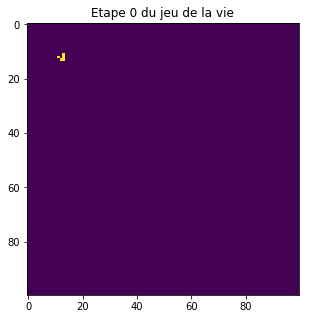

In [19]:
affichage_jeu(Z_huge, 0)

In [20]:
from ipywidgets import interact
from ipywidgets import fixed

In [21]:
interact(affichage_jeu, Etat_jeu = fixed(Z_huge) ,Iteration = (0, 30, 1));

interactive(children=(IntSlider(value=0, description='Iteration', max=30), Output()), _dom_classes=('widget-in…

Nous proposons maintenant de définir une nouvelle matrice initiale Z_huge_new afin de rendre le widget plus fluide et d'avoir une meilleure visualisation des états du jeu de la vie.

In [22]:
Z_huge_new = np.zeros((30, 30))
Z_np_new = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
Z_huge_new[10:16, 10:16] = Z_np_new

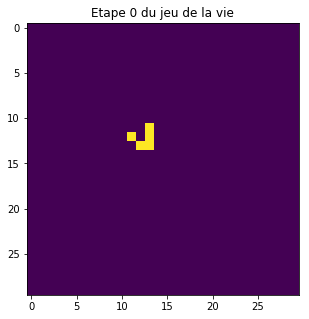

In [23]:
affichage_jeu(Z_huge_new, 0)

In [24]:
interact(affichage_jeu, Etat_jeu = fixed(Z_huge_new), Iteration = (0, 30, 1));

interactive(children=(IntSlider(value=0, description='Iteration', max=30), Output()), _dom_classes=('widget-in…

# EXERCICE 2 : Régression Logistique

Nous allons utiliser la base de données MNIST qui comporte les descriptions de chiffres manuscrits (0, 1, 2, ..., 9) en format 28 × 28, soit 784 pixels, et les étiquettes associées. La base contient en tout 70 000 exemples, c’est-à-dire 7000 exemples de chaque chiffre.


### Question 1 : 

Nous chargeons la base de données MNIST à l'aide de la seconde commande proposée dans l'énoncé.

In [25]:
import sklearn ## Vérification version
sklearn.__version__ 

'0.20.3'

In [26]:
from sklearn.datasets import fetch_openml ## Importation des données MNIST


In [27]:
mnist = fetch_openml('mnist_784')

X = mnist.data.astype('float64')
y = mnist.target.astype(np.int8)


In [28]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [29]:
X.shape

(70000, 784)

In [30]:
y.shape

(70000,)

In [31]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

La matrice X, de taille (70000, 784), contient des vecteurs dont les éléments codent chaque image (pixels) de la base de données. Le vecteur y, de longueur 70000, contient les étiquettes de ces images.

### Question 2:
    
Nous transformons X et y pour ne garder que les cas des chiffres 3 et 7. X ne contiendra plus que les vecteurs codant les images des chiffres 3 et 7, et y les étiquettes correspondantes.

In [33]:
classe_3 = np.array(y == 3)
classe_7 = np.array(y == 7)
classe_3_7 = classe_3 + classe_7

X_3_7 = X[classe_3_7]
y_3_7 = y[classe_3_7]


Nous visualisons avec imshow un exemple de chaque classe d'image (un X donc), en utilisant un reshape adapté.

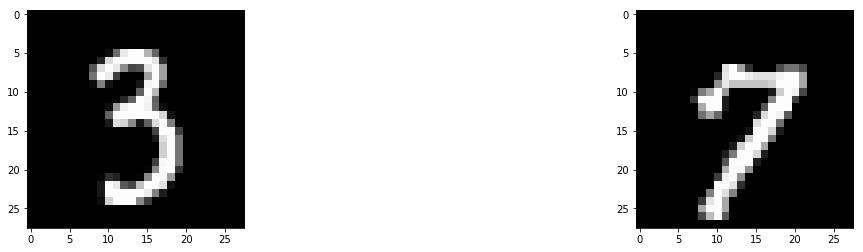

In [34]:
plt.figure(figsize = (20, 4))

plt.subplot(1, 2, 1)
image_3 = X[classe_3][10].reshape((28, 28))
plt.imshow(image_3, cmap = plt.cm.gray)

plt.subplot(1, 2, 2)
image_7 = X[classe_7][30].reshape((28, 28))
plt.imshow(image_7, cmap = plt.cm.gray)

La première image est effectivement un 3 et la deuxième image un 7.

### Question 3:

Nous allons utiliser la fonction $LogisticRegression$ pour apprendre un modèle de classification sur les données. Nous choisirons un cas sans ordonnée à l'origine, c'est-à-dire l'option fit_intercept = False.

In [35]:
from sklearn import linear_model

logisticRegr = linear_model.LogisticRegression(fit_intercept=False)
logisticRegr.fit(X_3_7, y_3_7)

C:\Users\Emeline\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Le modèle prédit alors la classe d'une image en considérant une image comme un vecteur $x$ et en choisissant l'une des deux classes selon le signe de $w^\top x$, où $w$ est le vecteur appris par la méthode et stocké dans l'attribut .coef_. 

In [36]:
w = logisticRegr.coef_

Nous observons la taille de $w$ qui constituera une information utile, à la question suivante, dans l'application de la fonction.

In [37]:
w.shape

(1, 784)

### Question 4 :

Dans cette question, nous proposons un widget qui investigue l'impact de la transformation de l'image par l'opération suivante : $$x_{mod} = x - \alpha \frac{w^\top x}{{\|w\|}^2} w .$$

Nous prendrons pour $x$ l'image associée au chiffre 7 de la question 2. Le widget fera varier $\alpha$ de 0.1 à 100 avec un pas de 0.1.

Nous définissons la fonction $fig\_digit$ dans le fichier utils.py et nous l'appelons.

In [38]:
from utils import fig_digit

In [39]:
help(fig_digit)

Help on function fig_digit in module utils:

fig_digit(x_init, w_regression, alpha=0.1)
    Entrées : fit_digit prend en arguments le vecteur codant l'image initiale : x_init,
                    le vecteur w contenant les coefficients obtenus par la régression : w_regression,
                    un réel alpha.
    
    fit_digit affiche l'image de x_init, transformée par l'opération suivante :
    x_mod = x_init - alpha * ((w_regression^T * x_init) / norme(w_regression)**2) * w_regression.



Nous allons tester la fonction $fit\_digit$ avec le $x$ de l'image associé au chiffre 7 (de la question précédente), le $w$ obtenu par la régression logistique, et $\alpha = 0.1$.

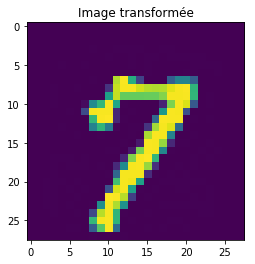

In [40]:
x_img_7 = X[classe_7][30]
fig_digit(x_img_7, w.T, 0.1)

Nous créons maintenant le widget dont le curseur permet de faire varier la valeur de $\alpha$.

In [41]:
interact(fig_digit, x_init = fixed(x_img_7), w_regression = fixed(w.T), alpha = (0.1, 100, 0.1));

interactive(children=(FloatSlider(value=0.1, description='alpha', min=0.1), Output()), _dom_classes=('widget-i…

### Question 5 : 

Dans cette question, nous allons créer un film représentant l'évolution de l'image en fonction de $\alpha$, que nous importerons en html dans le notebook.

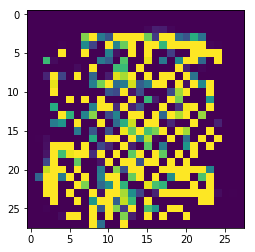

In [42]:
from matplotlib import animation

# Définition de la figure
fig = plt.figure()
image = plt.imshow(x_img_7.reshape(28, 28), animated = True)

# Fonction pour l'animation
def animate(alpha):
    x_mod = x_img_7.reshape(784, 1) - alpha * (np.dot(w, x_img_7.reshape(784, 1)) * w.T) / np.linalg.norm(w.T)**2
    x_mod_anim = x_mod.reshape(28, 28)
    image.set_array(x_mod_anim)
    return image,

anim = animation.FuncAnimation(fig, animate, frames = 200, interval = 0.1, blit = True)

# Sauvegarde de l'animation au format mp4
anim.save('animation_MNIST.mp4', fps = 30, extra_args = ['-vcodec', 'libx264'])

plt.show()

In [43]:
from IPython.display import HTML

HTML("""<video width = "100%" controls> <source src = "animation_MNIST.mp4">""")

### Question 6 : 

Décrivons mathématiquement ce que paramétrise le paramètre $\alpha > 0$.

Nous avons utilisé l’algorithme de descente de gradient. Il consiste à  modifier la valeur de x par l'opération:

 $$x_{mod} = x - \alpha \frac{w^\top x}{{\|w\|}^2} w .$$ où $\alpha$ est appelé le taux d’apprentissage (learning rate) et contrôle la vitesse de l’optimisation. Cette étape est repétée un nombre pré-défini d’itérations ou jusqu’à convergence de l’apprentissage.


Le paramètre $\alpha > 0$ paramétrise la modification de l'image $x$. En effet, dans la formule $$x_{mod} = x - \alpha \frac{w^\top x}{{\|w\|}^2} w ,$$ le vecteur $w$ des coefficients de la régression logistique et le vecteur $x$ codant les pixels de l'image, restent constants. Le paramètre $\alpha$ est un coefficient multiplicateur de $\frac{w^\top x}{{\|w\|}^2} w$, et plus celui-ci augmente, plus la différence entre le $x$ initial et le $x$ transformé sera grande. Donc, l'image sera d'autant plus modifiée que le vecteur $\alpha$ augmentera.

Nous pouvons constater cela via le widget et le film. Lorsque $\alpha$ est très proche de 0, les images, initiale et transformée, sont similaires. Nous observons la différence entre ces images s'accroître en augmentant $\alpha$. Quand la valeur de $\alpha$ est très élevée (par exemple $\alpha = 100$), le chiffre sur l'image n'est même plus perceptible.

### Question 7 :

Nous allons proposer une analyse en composante principale afin de visualiser la base de données dans un espace de dimension 2. Nous ajusterons les couleurs selon la classe des données.

Automatically created module for IPython interactive environment


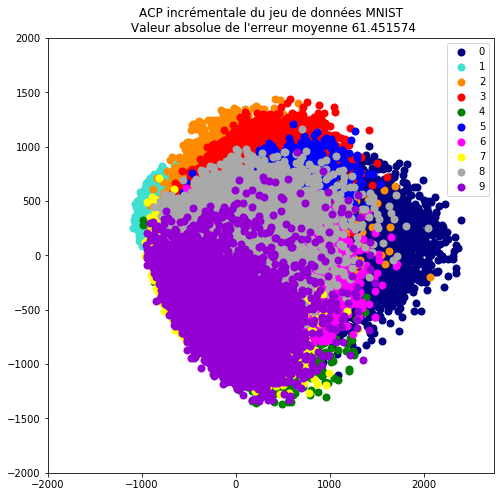

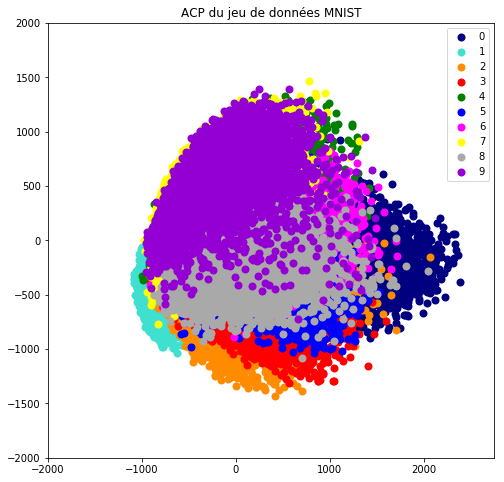

In [44]:
print(__doc__)

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

n_components = 2
ipca = IncrementalPCA(n_components = n_components, batch_size = 10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X)

y_names = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'blue', 'magenta', 'yellow', 'darkgrey', 'darkviolet']

for X_transformed, title in [(X_ipca, "ACP incrémentale"), (X_pca, "ACP")]:
    plt.figure(figsize = (8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color = color, lw = 2, label = target_name)

    if "incrémentale" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " du jeu de données MNIST\n Valeur absolue de l'erreur moyenne " "%.6f" % err)
    else:
        plt.title(title + " du jeu de données MNIST")
    plt.legend(loc = "best", shadow = False, scatterpoints = 1)
    plt.axis([-2000, 2750, -2000, 2000])

plt.show()

Nous observons les dix classes, chaque chiffre (de 0 à 9) étant représenté par une couleur comme indiqué dans la légende.